In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf , pacf 
from statsmodels.tsa.arima_model import ARIMA 
from datetime import datetime, timedelta
register_matplotlib_converters()

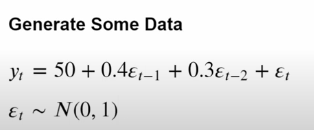

In [2]:
errors = np.random.normal(0,1,400)

date_index = pd.date_range(start='9/1/2019' , end='1/1/2020')

mu = 50 

series = []

for t in range(1 , len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])


series = pd.Series(series , date_index)
series = series.asfreq(pd.infer_freq(series.index))

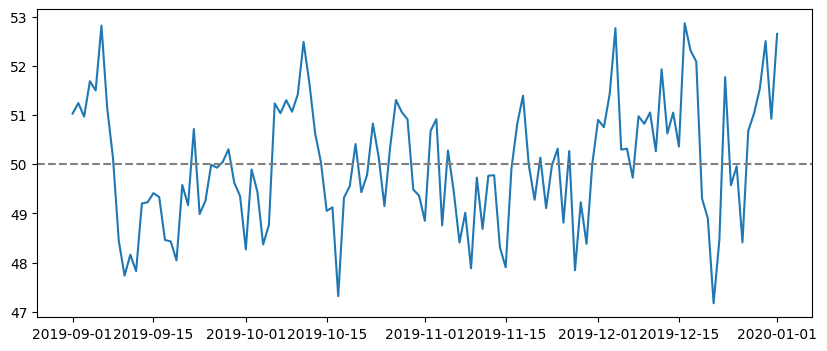

In [4]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu , linestyle='--', color='grey')

# ACF

<Figure size 1000x400 with 0 Axes>

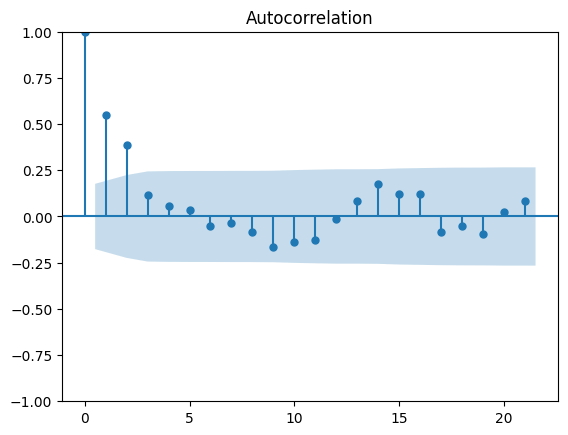

In [7]:
plt.figure(figsize=(10,4))

plot_acf(series)
plt.show()

<Figure size 1000x400 with 0 Axes>

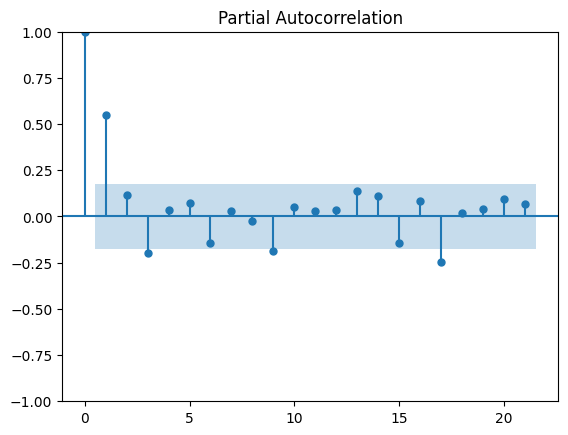

In [8]:
plt.figure(figsize=(10,4))

plot_pacf(series)
plt.show()

GET TRAINING AND TETING SETS

In [9]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

FIT ARIMA MODEL

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order = (0,0,2))


In [12]:
model_fit = model.fit()

In [13]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -172.334
Date:                Sat, 06 Jul 2024   AIC                            352.668
Time:                        11:10:45   BIC                            363.851
Sample:                    09-01-2019   HQIC                           357.210
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0049      0.192    260.373      0.000      49.628      50.381
ma.L1          0.5639      0.090      6.284      0.000       0.388       0.740
ma.L2          0.4801      0.081      5.943      0.0

Here coefficients of the time lags is 0.5639 and 0.4801 , whereas the coefficients we have taken 
is 0.4 and 0.3 , so there is some difference here 

In [14]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

residuals = test_data - predictions

In [15]:
plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

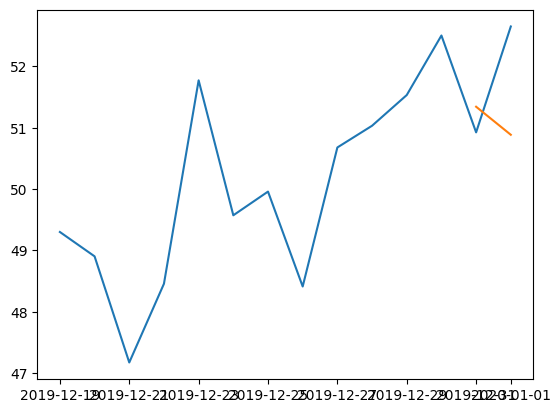

In [16]:
plt.plot(series[-14:])
plt.plot(predictions)


In [17]:
print('Mean Absolute Percent Error:' , round(np.mean(abs(residuals/test_data)), 4))

print('Root Mean Squared Error:' , np.sqrt(np.mean(residuals**2)))

Mean Absolute Percent Error: 0.0209
Root Mean Squared Error: 1.2828947166772067
